# Acoustic levitation in cold room

## Preparing the droplet

The needle of the syringe could be hydrophobic or an [hydrophobising agent](https://www.rapidonline.com/servisol-6100008000-super-40-moisture-repellent-400ml-87-0775) (water repellent for windows) could be used before using a standard needle. Jonny said of using [mineral oil](https://www.sigmaaldrich.com/catalog/product/sial/330779?lang=en&region=GB&cm_sp=Insite-_-caSrpResults_srpRecs_srpModel_330779-_-srpRecs3-1) as hydrophobic.

The droplet can be covered by [silicon oil](https://www.alfa.com/en/catalog/A12728/) (hydrophilic) to avoid evaporation.


## Video Acquisition

Acquisition of video of a levitated droplet with a Chronos high speed camera. Manual stop recording after freezing of droplet. Big droplet, pure water, feezed at -16 °C.

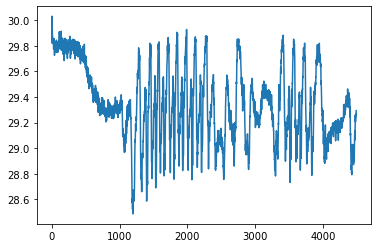

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig

def applyROI(im, roi):
    imCrop = im[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
    return imCrop

def butter_lowpass_filter(cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = sig.butter(order, normal_cutoff, btype='low', analog=False)    
    return a, b

fromCenter = False

vidcap = cv2.VideoCapture('C:\\Users\\j05625pe\\Documents\\Work\\ExperimentalColdRoom\\vid_2021-03-04_16-13-22.mp4')
if not vidcap.isOpened():
    assert(False)
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
avg = np.zeros(length)
success, image = vidcap.read()

r = cv2.selectROI('select', image, fromCenter)   # Press ENTER after selecting ROI
cv2.destroyWindow('select')

# Filter specs
fs = 1057       # sample rate, Hz
cutoff = 200      # desired cutoff frequency of the filter, Hz
order = 2       # sin wave can be approx represented as quadratic
Tduration = length/fs

count = 0
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    avg[count] = np.mean(applyROI(image, r))
    success, image = vidcap.read()  
    count += 1
vidcap.release()

a, b = butter_lowpass_filter(cutoff, fs, order)
avg_filt = sig.filtfilt(b, a, avg)
plt.plot(avg_filt)

# Effects of water repellent, voltage and gauge size in levitated droplets

2021-03-29 Set-up:
- 4.51 mm aspheric lens in CP32/M
- 10.08 mm to external case of rotating plate, wheel towards lens. With sapphire 5mm window
- 35.78 mm from rotating plate to SM2 tube (external thread, not tube itself)
- SM2 1" tube, adapter to C-mount
- Optronis camera

Using Test 4 configuration in `Frame Grabber and cameras.ipynb` with 100 us exposure.



# Temperature of drops (Paul Connolly)

<IPython.core.display.Javascript object>


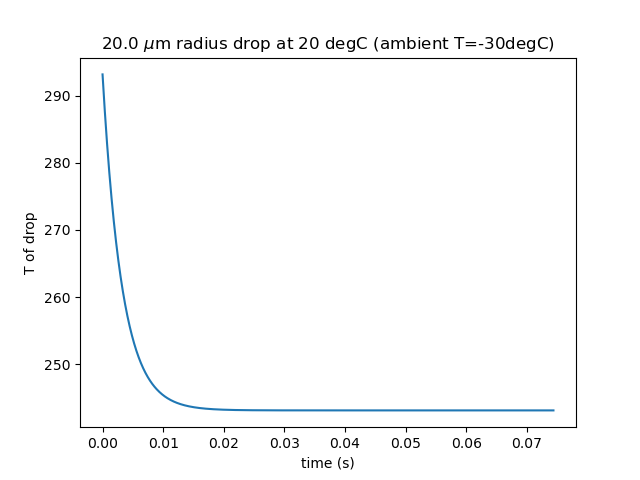

The drop should fall at least for 14.9 ms, which means 1.8 cm at 1.20 m/s.
The temperature of the drop after falling 0.0003 cm is -29.98 degC.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

T_room_deg = -30
T_drop_ini = 20
P = 100000.
a = 20.e-6 # drop radius
m = np.pi/6.*1000.*a**3 # drop mass
c = 4200.

Tr = T_room_deg + 273.15

Dv = 2.11e-5*(Tr/273.15)**1.94*(101325/P)

k = (4.40+0.071*Tr)*1.e-3

deltaT1 = T_drop_ini - T_room_deg
tolerance = 0.5 # deg C
time_to_room_temp = -np.log(tolerance / deltaT1) / (4.*np.pi*a*k/(m*c))

time_final = 5 * time_to_room_temp
t = np.linspace(0,time_final,1000)
deltaT = deltaT1 * np.exp(-4.*np.pi*a*k*t/(m*c))

plt.plot(t, deltaT+Tr)
plt.xlabel('time (s)')
plt.ylabel('T of drop')
plt.title(str(a*1e6) + ' $\mu$m radius drop at ' + str(T_drop_ini) + ' degC (ambient T='+ str(T_room_deg) + 'degC)')
plt.ion()
# plt.show()

# plt.savefig('/tmp/delta_T.png')

# Terminal drop velocity
# https://www.igf.fuw.edu.pl/m/documents/10/d5/10d5176f-b78e-4987-bb6f-f1997a9e6f1b/tutorial_velocity.pdf
u_inf = 1.2 # 250um -> 2.0; 150 -> 1.1; 100 -> 0.8   # m/s
# Navier-Stokes
# g = 9.8  # m/s
# density = 1
# nu = # 
# u_inf_ns = 2/9 * r**2 * g * density / nu / rho
# Correction factor for drops with radius r : 1um < r < 20 um
# if radius < 20e-6
#     f = eta0 / eta * (1+1.255*l)
# else
#     f = 
# u_inf = 

# How long should it fall to get to room temperature
length_fall = u_inf * time_to_room_temp
print(f'The drop should fall at least for {time_to_room_temp/1e-3:.1f} ms, which means {length_fall/1e-2:.1f} cm at {u_inf:.2f} m/s.')

# What's the drop temperature after a particular falling distance?
falling_distance = 0.03
time_fall = falling_distance / u_inf
T_hit = T_room_deg + deltaT1 * np.exp(-4.*np.pi*a*k*time_fall/(m*c))
print(f'The temperature of the drop after falling {falling_distance/100:.2} cm is {T_hit:.2f} degC.')

# Sapphire windows requirements

Formulas to get thickness to avoid condensation.

The convective heat transfer coefficient for air flow can be approximated to $$hcW = 12.12 - 1.16 v + 11.6 v1/2$$

where hcW = heat transfer coefficient (W/m2°C)

In [2]:
import numpy as np

v = 2 # m/s
hc = 12.12-1.16 * v + 11.6*np.sqrt(v)
print(f'Convective heat transfer coefficient at v = {v} m/s is {hc} W/m2°C')

Convective heat transfer coefficient at v = 2 m/s is 26.204877323527903 W/m2°C


The overall heat transfer coefficient of a plane wall is:

$1 / U = 1 / hci + sn / kn + 1 / hco$

kn = thermal conductivity of material in layer n  [W/(m K)]

hc i,o = inside or outside wall individual fluid convection heat transfer coefficient (W/(m2 K), Btu/(ft2 h oF))

sn = thickness of layer n [m]

In [3]:
hci = 5
hco = 25
s = .005 # m
k_sap = 46.06 # W/(m • K)
U = 1/(1/hci + s/k_sap + 1/hco)
print(f'Heat transfer coefficient : {U} W/(m2 K)')

Heat transfer coefficient : 4.164782899614807 W/(m2 K)


# Holographic system

- Look at environment without a cover for the door gap.
- See difference with the enclosed door gap.

# Cold room tests of holographic equipment

## 2022-05-13 : Cold room air & Ice growing

### Calibration using grid

mogrify -format png \*.tiff

Script `C:\Work\Scripting\focus_to_camera_estimation_variable_steps.m`:

The effective distance from the source to the sensor is 88.45 mm (87.92 mm with the grid in).
The actual distance from the source to the sensor is 93.41 mm.

#### 2022-05-16 calibration using grid

Discard last 11 images as there is some error with the distance measurement.

The effective distance from the source to the sensor is 98.05 mm (97.52 mm with the grid in).
The actual distance from the source to the sensor is 103.00 mm.

### Contrast holograms

Use `contrast_video_from_images.py` to get the contrast images. Use 

# Droplet nanodispenser

## Working in the cold room

The head of the dispenser is the only thing inside the cold room.:
- A long cable (Farnell 3490939) is used for connecting the head to the controller. 
- The head is placed inside of an envelope with good thermal insulation and a 10W resistor is attached to the surface of the dispenser. 
- A cap has to be used for the liquid container (piece of glove with strap). 
- Think of a 3D printed small encloure for the head.
- The front of the door has to be covered so that fans don't mess with the trajectory of the falling drops.
- Try with different pipe sizes.

Drops with radius larger than 100 um would need trajectories longer than 20 cm to reach the room temperature.

## Working with different relative velocities

- Maximum speed with linear and rotational stages.
- Try moving the head and measure speed of drops.
- Try moving a rod to change speed of arrival.

# Freeze/Shattering

- Use of hydrophobic coating in glass slides and see what happens to a freezing drop.
    - Collimated beam for looking with normal hydrophobic slide.
- Custom-made slide for using diverging beam.